# Basic setup

In [7]:
import numpy as np # linear algebra

np.random.seed(42) # sets the random seed for reproducibility

create the `images` folder (if it doesn't already exist), and define the `save_fig()` function which is used through this notebook to save the figures in high-resolution

In [8]:
from pathlib import Path

IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Basic concepts

In [9]:
m = 4 # number of instances
n = 3 # number of features including bias term

In [10]:
xi = np.random.randint(1, 10, n).reshape(n,1)  # generates 3 random integers between 1 and 10
xi # shows the feature vector (column) of the ith instance

array([[7],
       [4],
       [8]], dtype=int32)

In [11]:

X = np.random.randint(1, 10, n*m).reshape(n, m) # generates 12 random integers between 1 and 10 and reshapes them into a 3x4 matrix

X[0] = 1 # sets the first row to 1 to represent the bias feature

X # shows the feature matrix with 4 instances (Columns) and the first feature represent the bias feature

array([[1, 1, 1, 1],
       [8, 5, 4, 8],
       [8, 3, 6, 5]], dtype=int32)

In [12]:
Y = np.random.randint(10, 20, 4).reshape(1, m) # generates 4 random integers between 10 and 20 and reshapes them into a 1x4 matrix

Y # shows the target values for the 4 instances

array([[11, 17, 15, 11]], dtype=int32)

In [13]:
theta = np.random.randn(n,1) # generates a 3x1 column vector of random weights (parameters) where first weight represents the bias

theta

array([[-0.46341769],
       [-0.46572975],
       [ 0.24196227]])

In [14]:
print(X[:, 1]) # shows the second instance (column) with its 3 features

print(X[1]) # shows the second features (row) for all 4 instances

[1 5 3]
[8 5 4 8]


In [15]:
x1theta = X[:, 1]@theta # computes the dot product of the second instance's feature vector with the parameter vector theta
# This works as while geting the features for a instance using indexing it gives the feature of the instance as a row vector 1x3,
# but while doing the matrix multiplication with the X matrix it treats it as a column vector 3x1 so it will give error,
# at that time we have to use the transpose on the theta vector to make it 1x3 so that the multiplication can be done
# alternatively we can also use the np.dot() function which automatically handles the dimensions
x1theta

array([-2.06617965])

In [16]:
# Linear regression Cost for a single training instance
x1 = X[:,1] # feature vector of the second instance (3 features)

print('feature vector of the second instance (3 features):\n',x1)

y1 = Y[:,1] # target value of the second instance

print('target value of the second instance:\n',y1)

cost = (y1 - x1@theta)**2 / 2 # computes the cost

print('cost:\n',cost)

feature vector of the second instance (3 features):
 [1 5 3]
target value of the second instance:
 [17]
cost:
 [181.75960315]


In [17]:
theta.T.dot(X) # computes the predictions for all 4 instances

array([[-2.25355755, -2.06617965, -0.87456308, -2.97944436]])

In [18]:
theta.T@X # computes the predictions for all 4 instances I prefer this notation

array([[-2.25355755, -2.06617965, -0.87456308, -2.97944436]])

### Reason
Operator / Function	Name	Behavior with NumPy Arrays
* @ :	Infix Operator	Performs true matrix multiplication.
* \* :	Multiplication Operator	Performs element-wise multiplication. Both arrays must have the same shape.
* numpy.dot()	: Function / Method	Can perform matrix multiplication, but its behavior with higher-dimensional arrays is more complex than @.
* numpy.matmul() : Function / The underlying function that the @ operator calls. Its behavior is identical to @.

Why Use @?

Readability: Code using @ is much cleaner and more closely resembles mathematical notation. C = A @ B is more intuitive than C = np.matmul(A, B).

Clarity: It eliminates the ambiguity of the * operator, making it clear that a matrix operation, not an element-wise one, is intended.

Consistency: It provides a standard, universal operator for matrix multiplication across different Python libraries that choose to implement it.



In [19]:
cost_matrix = Y - theta.T@X # computes the errors for all 4 instances
cost_matrix # matrix of shape 1x4

array([[13.25355755, 19.06617965, 15.87456308, 13.97944436]])

In [20]:
Total_cost = np.sum((cost_matrix)**2) / 2 # computes the total cost for all 4 instances
Total_cost

np.float64(493.30130580701774)

In [21]:
# Batch Gradient Descent for Linear Regression
Batch_gradient = 2*cost_matrix@X.T/ m # computes the batch gradient
Batch_gradient # shape nx1

array([[ 31.08687232, 188.34658292, 164.18579981]])

# Linear regression from fundamentals

#### Synthetic data for demonstration
* Number of features including bias terms (n): 2
* Number of instances (m): 1000




In [22]:
m = 100 # number of instances
n = 3 # number of features including bias term 

X = 2 * np.random.rand(1, m)  # base variable (row vector)
bias = np.ones((1, m))  # column of ones for bias term
X_p = X
for i in range(2,n):
    X_p = np.concatenate((X_p, X**i), axis=1)
    print(X_p.shape)
X_p = np.concatenate((bias, X_p), axis=1).reshape(n,m)
X_p # feature matrix with polynomial features of nxm shape where n is number of features and m is number of instances

Op_theta = np.random.randint(1, 11, size=(n, 1)) # Original polynomial parameters (column vector)

Y = Op_theta.T@X_p + np.random.randn(1, m)  # row vector of target values with some noise

theta = np.random.randn(n,1) # random initialization of parameters

(1, 200)


In [23]:
print(X.shape, Y.shape, X_p.shape, theta.shape) # shapes of X, Y, X_p, and theta

(1, 100) (1, 100) (3, 100) (3, 1)


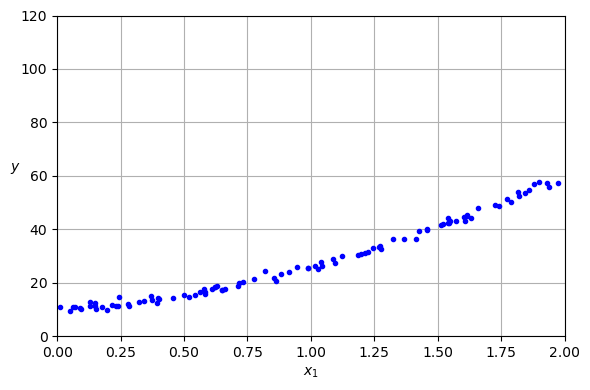

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4)) # sets the figure size to 6 inches by 4 inches
plt.plot(X, Y, "b.") # plots the data points as blue dots
plt.xlabel("$x_1$") # sets the x-axis label to "x1"
plt.ylabel("$y$", rotation=0) # sets the y-axis label to "y" with no rotation
plt.axis([0, 2, 0, 120]) # sets the x-axis from 0 to 2 and y-axis from 0 to 120
plt.grid() # adds a grid to the plot
save_fig("generated_data_plot") # saves the figure using the save_fig function
plt.show()

#### Predict function

In [25]:
def predict_batch(X, theta):
    predictions = theta.T @ X.T # computes predictions for all instances
    return predictions

#### Cost function

In [26]:

def cost_function(X, Y, theta):
    m = X.shape[1] # number of instances
    cost_matrix = Y - theta.T@X # computes the errors for all instances
    total_cost = np.sum((cost_matrix)**2) / (2 * m) # computes the total cost
    return total_cost, cost_matrix # returns the total cost and the cost matrix

#### Batch Gradiant function

In [27]:
def gradiant_function(X, cost_matrix):
    m = X.shape[1] # number of instances
    batch_gradient = 2 *cost_matrix@X.T/ m # computes the batch gradient
    return batch_gradient # returns the batch gradient of shape nx1

#### Batch Gradiant Descent function

In [28]:
def BGD_fit(X, Y, theta, learning_rate, iterations):
    m = X.shape[1] # number of instances
    n = X.shape[0] # number of features including bias term
    cost_history = np.zeros(iterations) # initializes an array to store cost at each iteration
    
    for i in range(iterations):
        total_cost, cost_matrix = cost_function(X, Y, theta) # computes the total cost and cost matrix
        batch_gradient = gradiant_function(X, cost_matrix) # computes the batch gradient
        theta = theta + learning_rate * batch_gradient.T # updates the parameters
        cost_history[i] = total_cost # stores the total cost for this iteration
        
    return theta, cost_history # returns the final parameters and the cost history

#### Training the model

In [29]:
pred_theta, cost_hist = BGD_fit(X_p, Y, theta, learning_rate=0.01, iterations=3500)

In [30]:
print('Prediction theta =\n',pred_theta, '\nOriginal theta =\n', Op_theta)

Prediction theta =
 [[9.81171212]
 [7.08649751]
 [9.07690417]] 
Original theta =
 [[10]
 [ 7]
 [ 9]]


#### Prediction

In [31]:
cord = 5 # points for prediction plotting
X_new = np.array([[0,0.75,1.25, 1.5, 2]]).reshape(cord) # Coordinates for prediction plotting
X_new.shape


(5,)

In [32]:
Y_pred = np.array([(pred_theta[0]+pred_theta[1]*X_new[0]+ pred_theta[2]*X_new[0]**2),
                   (pred_theta[0]+pred_theta[1]*X_new[1]+ pred_theta[2]*X_new[1]**2),
                   (pred_theta[0]+pred_theta[1]*X_new[2]+ pred_theta[2]*X_new[2]**2),
                   (pred_theta[0]+pred_theta[1]*X_new[3]+ pred_theta[2]*X_new[3]**2),
                   (pred_theta[0]+pred_theta[1]*X_new[4]+ pred_theta[2]*X_new[4]**2)]).reshape(cord) # predictions for all coordinates
Y_pred

array([ 9.81171212, 20.23234385, 32.85249677, 40.86449277, 60.29232383])

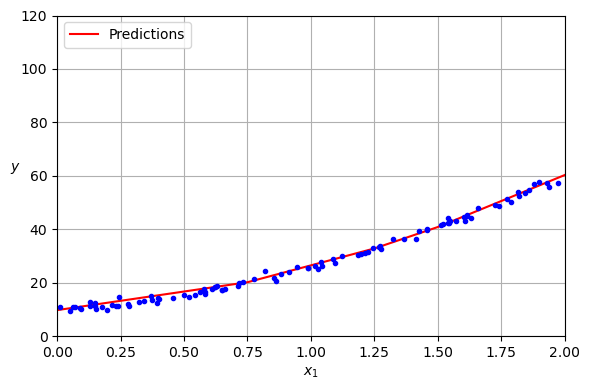

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4)) # the figure size is 6 inches by 4 inches
plt.plot(X_new, Y_pred, "r-", label="Predictions") # plots the prediction line
plt.plot(X, Y, "b.") # plots the original data points

plt.xlabel("$x_1$") # sets the x-axis label
plt.ylabel("$y$", rotation=0) # sets the y-axis label
plt.axis([0, 2, 0, 120]) # sets the x-axis from 0 to 2 and y-axis from 0 to 120
plt.grid() # adds a grid to the plot
plt.legend(loc="upper left") # adds a legend to the plot
save_fig("polynomial_model_predictions_plot")
plt.show()